In [14]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as mplot
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import os 
import random
from sklearn.tree import export_graphviz
import seaborn as sns


from sklearn.datasets import load_files 
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score,  precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, roc_curve, auc
 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler 

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder



In [9]:
dataSetIndex = 7
needToMakePictureOfTrees = 0
''' ---------------------------------------------------------- '''
dataSetFilePath = ""
dataSetName = ""
dataSetResultDirectory = "./"

if(dataSetIndex == 0):
    dataSetFilePath = "./DataSets/0_statLog_dataSet.csv"
    dataSetName = "SateLog_DataSet"
elif (dataSetIndex == 1):
    dataSetFilePath = "./DataSets/1_heart_statlog_cleveland_hungary_final.csv"
    dataSetName = "ALL_StateLog_CleveLand_Hungary"
elif (dataSetIndex == 2):
    dataSetFilePath = "./DataSets/2_cleveland.csv"
    dataSetName = "Cleveland"
elif (dataSetIndex == 3):
    dataSetFilePath = "./DataSets/3_framingham.csv"
    dataSetName = "framingham"
elif (dataSetIndex == 4):
    dataSetFilePath = "./DataSets/4_CardiacPrediction.xlsx"
    dataSetName = "CardiacPrediction"
elif (dataSetIndex == 5):
    dataSetFilePath = "./DataSets/5_CardiacPredictionLessDimensions.xlsx"
    dataSetName = "CardiacPrediction"
elif (dataSetIndex == 6):
    dataSetFilePath = "./DataSets/6_CardiacPredictionFewDimensions.xlsx"
    dataSetName = "CardiacPrediction"
elif (dataSetIndex == 7):
    dataSetFilePath = "./DataSets/iris.csv"
    dataSetName = "Iris_Flower"
elif (dataSetIndex == 8):
    dataSetFilePath = "./DataSets/Online_Retail.csv"
    dataSetName = "Online_Retail"
elif (dataSetIndex == 9):
    dataSetFilePath = "./DataSets/worldcities.csv"
    dataSetName = "World_Retail"
else:
    dataSetFilePath = ""
    dataSetName = ""

if(dataSetIndex==4 or dataSetIndex==5 or dataSetIndex==6):
    #fileData = pd.read_excel(dataSetFilePath, sheet_name='CoroHeartDis')
    fileData = pd.read_excel(dataSetFilePath)
else:
    fileData = pd.read_csv(dataSetFilePath)

print("Shape of fileData: {}".format(fileData.shape))
print("Column Headings: {}".format(fileData.__dataframe__().column_names()))
print("Number of Records: {}".format(fileData.__dataframe__().num_rows()))


missingValues = fileData.isnull().any().sum()
print(f"\nNumber of Missing Values: {missingValues}")

num_rows_before = fileData.shape[0]
# Remove duplicate records based on all columns
fileData.drop_duplicates(inplace=True)
# Check the number of rows after removing duplicates
num_rows_after = fileData.shape[0]
# Print the number of duplicate records removed
num_duplicates_removed = num_rows_before - num_rows_after
print(f"Number of duplicate records removed: {num_duplicates_removed}")
 
 # Preprocess Steps from the ChatGPT
# 1. Handling Missing Values:
fileData = fileData.dropna()
print("Shape of fileData: {}".format(fileData.shape))              
#fileData.replace({'?': np.nan}).dropna().astype(float)
#fileData = fileData.fillna(0) 

fileData = fileData.fillna(0) 

print("Shape of fileData End: {}".format(fileData.shape))



finalResultTable = [ ['Index', 'Method', 'Accuracy %','Recall %','Precision %','F1 Score','AUC'], ] 


dataSetResultDirectory += ("Results_" + dataSetName)
dataSetResultDirectory += "/"
if not os.path.isdir(dataSetResultDirectory):
    os.makedirs(dataSetResultDirectory)
 

X = fileData.drop(fileData.__dataframe__().column_names()[-1], axis=1)  # Features
Y = fileData[fileData.__dataframe__().column_names()[-1]]  # Labels

columns = fileData.__dataframe__().column_names() 
totalRecords = (fileData.__dataframe__().num_rows())

print("\n")
print("columns of x:: {} \n\n and features of X: {}".format(len(X.columns), X.columns))




Shape of fileData: (150, 5)
Column Headings: Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')
Number of Records: 150

Number of Missing Values: 0
Number of duplicate records removed: 1
Shape of fileData: (149, 5)
Shape of fileData End: (149, 5)


columns of x:: 4 

 and features of X: Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'], dtype='object')


Target Class Distribution:
variety
Setosa        50
Versicolor    50
Virginica     49
Name: count, dtype: int64


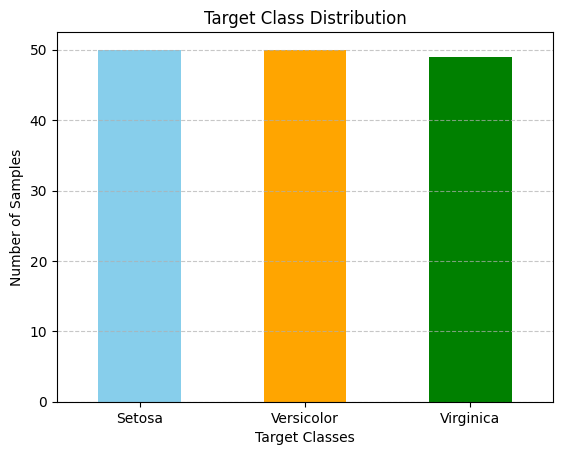

In [15]:
# Target Classes Distribution 
target_column = fileData.columns.to_list()[-1]

# Check the distribution of each target class
class_distribution = fileData[target_column].value_counts()

# Print the class distribution
print("Target Class Distribution:")
print(class_distribution)
  
# Bar plot of class distribution
class_distribution.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title("Target Class Distribution")
plt.xlabel("Target Classes")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
finalResultTable = [ ['Index', 'Method', 'Accuracy %','Recall %','Precision %','F1 Score', 'AUC'], ]

In [45]:
def makeCorrelationPic(correlationMatrix, numberOfTopFeatures, targetColumnName):     
    correlation_values = correlationMatrix.abs()
    sorted_correlation = correlation_values.unstack().sort_values(ascending=False)
    sorted_correlation = sorted_correlation[sorted_correlation != 1.0]

    num_features = numberOfTopFeatures  # Number of top features to display
    top_features = sorted_correlation.head(num_features)
    #print("Top", num_features, "features based on correlation:")
    #print(top_features)
 
    top_features = correlationMatrix.abs().nlargest(numberOfTopFeatures, targetColumnName)[targetColumnName].index
    top_correlation_matrix = correlationMatrix.loc[top_features, top_features]

    mplot.figure(figsize=(10, 8))
    sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm')
    # Set the title of the plot
    mplot.title('Correlation Heatmap ({})'.format(dataSetName)  ,fontsize=16, fontweight='bold')
    
    picturePath = "{}0.1_Correlation_Matrix_DateSetName_{}.png".format(dataSetResultDirectory, dataSetName)
    
    mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
    mplot.show()
    mplot.close()
def plot_classification_report(title, dataSetName, y_tru, y_prd, figsize=(6, 6), ax=None):
    #mplot.figure(figsize=figsize)
    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = ['Healthy', 'Heart Disease']
    rep = np.array( precision_recall_fscore_support(y_tru, y_prd) ).T
    rep[0][0] *= 100.0
    rep[0][1] *= 100.0
    rep[0][2] *= 100.0
    rep[1][0] *= 100.0
    rep[1][1] *= 100.0
    rep[1][2] *= 100.0
    
    ax = sns.heatmap(rep, annot=True, cmap='Blues', cbar=False, xticklabels=xticks, yticklabels=yticks)
    ax.set_title("Classification Report {} Model\n\n".format(title) ,fontsize=16, fontweight='bold')
    ax.set_xlabel('\nDataset:{}'.format(dataSetName))
    ax.xaxis.set_ticklabels(xticks)
    ax.set_ylabel('Classes')
    ax.yaxis.set_ticklabels(yticks)
    
    picturePath = "{}ClassificationReport_{}_{}.png".format(dataSetResultDirectory, title, dataSetName) 
    mplot.savefig(picturePath, dpi=300, bbox_inches='tight')
    #os.startfile(picturePath)
    mplot.close()

    
def makeConfusionMatrixPic(fileID, method, dataSet, classifierObj , X_test, y_test, predicted_Y):
    display = ConfusionMatrixDisplay.from_predictions(y_test,predicted_Y, cmap=mplot.cm.Blues) #, normalize="true"
    
    display.ax_.set_title("Confusion Matrix ({})".format(method) ,fontsize=16, fontweight='bold')
    display.ax_.set_xlabel('Predicted Values')
    display.ax_.set_ylabel('Actual Values ') 
 
    accuracyValue = (accuracy_score(y_test, predicted_Y)*100.0) 
    recallValue = (recall_score(y_test, predicted_Y, average='weighted') * 100.0)
    precisionValue = (precision_score(y_test, predicted_Y, average='weighted') * 100.0)
    f1Score = (f1_score(y_test, predicted_Y, average='weighted') * 100.0)

 
    singleRowInTable = [] 
    singleRowInTable.append(fileID)
    singleRowInTable.append(method)
    singleRowInTable.append("{:.2f}".format(accuracyValue) )
    singleRowInTable.append("{:.2f}".format(recallValue) )
    singleRowInTable.append("{:.2f}".format(precisionValue) )
    singleRowInTable.append("{:.2f}".format(f1Score) )
    singleRowInTable.append("-")

    finalResultTable.append((singleRowInTable) )


    accuracyString ="Accuracy : {:.2f} %".format( accuracyValue) 
    recallString =  'Recall : {:.2f} %'.format(recallValue)
    precisionString = 'Precision : {:.2f} %'.format(precisionValue)  
    f1String = 'F1 Score : {:.2f} %'.format(f1Score) 
    dataSetString = "Dataset: {}".format(dataSet)
    
    numberOfTrainingRecords = "No of Training Records: {}  {:.2f} %".format(len(X_train), ((len(X_train)/totalRecords) * 100.0))
    numberOfTestingRecords = "No of Testing Records: {}  {:.2f} %".format(len(X_test), ((len(X_test)/totalRecords) * 100.0))


    display.figure_.text(0.010, -0.05,  accuracyString, horizontalalignment='left', wrap=False , fontsize=12 )  
    display.figure_.text(0.010, -0.09,  recallString, horizontalalignment='left', wrap=False , fontsize=12 )      
    display.figure_.text(0.010, -0.13,  precisionString, horizontalalignment='left', wrap=False , fontsize=12 ) 
    display.figure_.text(0.010, -0.17,  f1String, horizontalalignment='left', wrap=False , fontsize=12 ) 
    display.figure_.text(0.010, -0.21,  dataSetString, horizontalalignment='left', wrap=False , fontsize=12 ) 
    #display.figure_.text(0.010, -0.25,  numberOfTrainingRecords, horizontalalignment='left', wrap=False , fontsize=12 ) 
    #display.figure_.text(0.010, -0.29,  numberOfTestingRecords, horizontalalignment='left', wrap=False , fontsize=12 ) 
    
    '''
    if(classifierObj.n_features_in_ > 10):
        featureListString = 'Total Features: {}'.format(classifierObj.n_features_in_) 
    else:
        featureListString = 'Features: {}'.format(classifierObj.feature_names_in_) 
    display.figure_.text(0.010, -0.28,  featureListString, horizontalalignment='left', wrap=False , fontsize=12 ) 
    '''
    
    picturePath = "{}{}.Confusion_Matrix_{}_{}.png".format(dataSetResultDirectory, fileID, method, dataSetName)
    mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
    #print("{} Confusion Matrix saved:: path: {}".format(method, picturePath))
    #os.startfile(picturePath)
    mplot.show()
    mplot.close()

 
   

In [16]:
labelEncodingAlgorithmFromScienceKit = LabelEncoder()

for col in fileData.select_dtypes(include=['object', 'category', 'bool', 'datetime']).columns:
    fileData[col] = fileData[col].str.lower()
    fileData[col] = fileData[col].str.strip()
    fileData[col] = labelEncodingAlgorithmFromScienceKit.fit_transform(fileData[col])
 

fileData.shape

fileData.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
X = fileData.drop(fileData.__dataframe__().column_names()[-1], axis=1)  # Features
Y = fileData[fileData.__dataframe__().column_names()[-1]]  # Labels

In [28]:
print("Shape of fileData: {} , target Len:{}".format(fileData.shape, len(Y)))
print("X: {} , Y:{}".format(X.shape, Y.shape))
#print("\n\nX: head:: \n{}".format(X.head()))
#print("\n\nY: head::\n {}".format(Y.head()))

print("Target Column Name:: {} \n".format(fileData.__dataframe__().column_names()[-1]))
  
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 

print("\n X Train: Shape:: {}".format(X_train.shape))
print(" X Test: Shape:: {}".format(X_test.shape))   
 


Shape of fileData: (149, 5) , target Len:149
X: (149, 4) , Y:(149,)
Target Column Name:: variety 


 X Train: Shape:: (104, 4)
 X Test: Shape:: (45, 4)


In [29]:
tableAImodelResultIndex = 1    

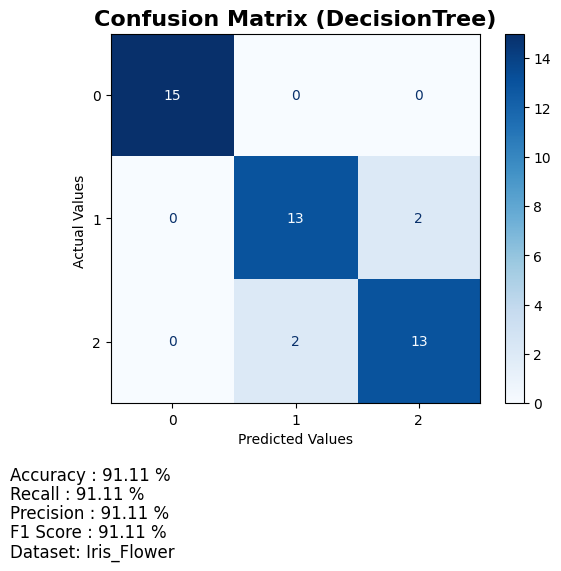

Accuracy: 0.9111111111111111


In [46]:
#2.     Decision Trees
classifierDT = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=8,  random_state=18) 
classifierDT.fit(X_train_scaled, y_train) 
predicted_DT = classifierDT.predict(X_test_scaled) 

methodName = "DecisionTree" 
makeConfusionMatrixPic(tableAImodelResultIndex, methodName, dataSetName, classifierDT , X_test, y_test, predicted_DT) 
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, predicted_DT)
print("Accuracy:", accuracy)
tableAImodelResultIndex = tableAImodelResultIndex + 1



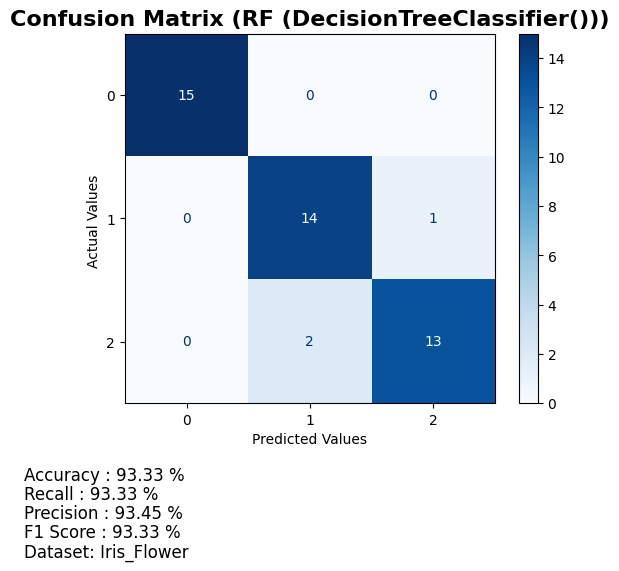

In [48]:
#3.     Random Forests
classifierRF = RandomForestClassifier(n_estimators=80, criterion="log_loss", max_depth=8, max_features=15,n_jobs=-1, oob_score=True, bootstrap=True, random_state = 18)
classifierRF.fit(X_train, y_train)
y_PredictionRF = classifierRF.predict(X_test)

methodName = f"RF ({classifierRF.estimator_})" 
#plot_classification_report(methodName, dataSetName, y_test, y_PredictionRF)  
makeConfusionMatrixPic(tableAImodelResultIndex, methodName, dataSetName, classifierRF , X_test, y_test, y_PredictionRF)
tableAImodelResultIndex = tableAImodelResultIndex + 1


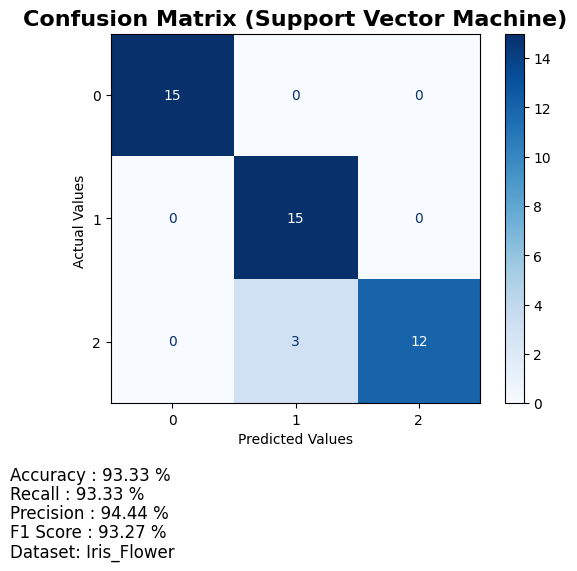

In [49]:
#4.     Support Vector Machines (SVM)
#classifierSVM = SVC(C=33, kernel="poly") 
classifierSVM = SVC() 
classifierSVM.fit(X_train, y_train)
y_PredictionSVM = classifierSVM.predict(X_test)

methodName = "Support Vector Machine"
makeConfusionMatrixPic(tableAImodelResultIndex, methodName, dataSetName, classifierSVM , X_test, y_test, y_PredictionSVM)
tableAImodelResultIndex = tableAImodelResultIndex +1

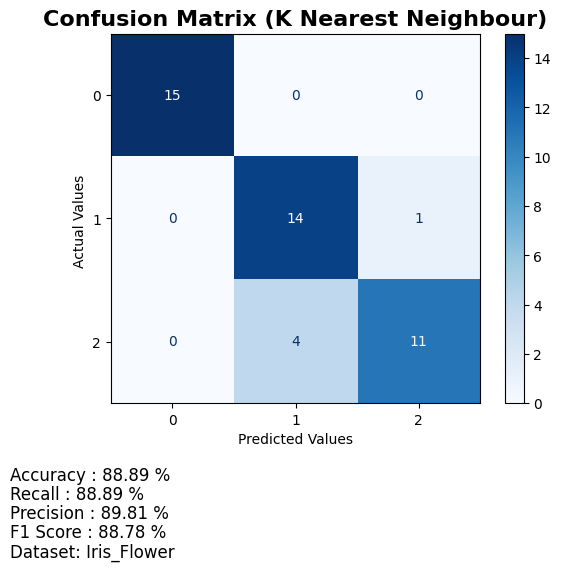

In [50]:
#5.     K-Nearest Neighbors (KNN)
classifierKNN = KNN(n_neighbors=50, weights='uniform', )
classifierKNN.fit(X_train, y_train)
y_PredictionKNN = classifierKNN.predict(X_test)

methodName = f"K Nearest Neighbour"
makeConfusionMatrixPic(tableAImodelResultIndex, methodName, dataSetName, classifierKNN , X_test, y_test, y_PredictionKNN)
tableAImodelResultIndex = tableAImodelResultIndex + 1

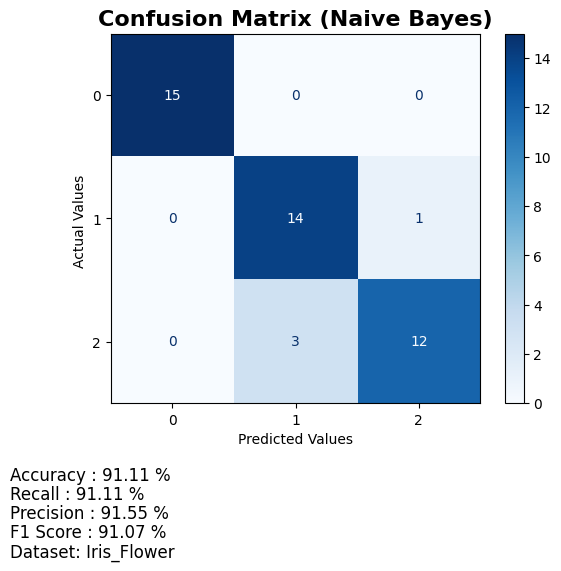

In [51]:
#6.     Naive Bayes (with appropriate modifications for numerical data, such as Gaussian Naive Bayes)
classifierNB = GaussianNB(var_smoothing=0.00001 )
classifierNB.fit(X_train, y_train)
predicted_NB = classifierNB.predict(X_test)

methodName = "Naive Bayes" 
makeConfusionMatrixPic(tableAImodelResultIndex, methodName, dataSetName, classifierNB , X_test, y_test, predicted_NB)
tableAImodelResultIndex = tableAImodelResultIndex +1

total Rows: 7 -> Cols: 7


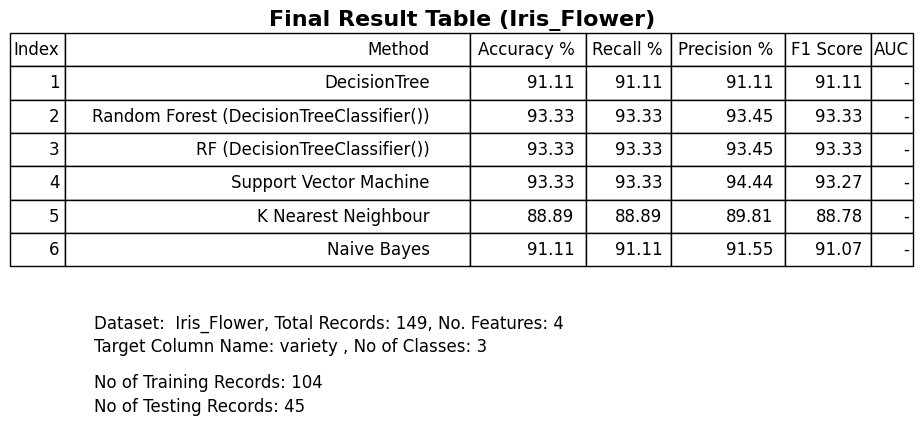

In [53]:
# Determine the number of rows in the table (excluding the header)
num_rows = len(finalResultTable) - 1
print("total Rows: {} -> Cols: {}".format(len(finalResultTable), len(finalResultTable[0])))
# Calculate the desired figure size based on the number of rows
fig_width = 6  # Set the desired width of the figure
fig_height = num_rows * 0.5  # Adjust the scaling factor to control the height

fig, ax = mplot.subplots(figsize=(fig_width, fig_height)) 
table = mplot.table(cellText=finalResultTable, loc='center') 

table.auto_set_column_width(col=list(range(len(finalResultTable[0]))))
table.auto_set_font_size(False)
table.set_fontsize(12) 
table.scale(2.0, 2.0) 

dataSetString = "Dataset:  {}, Total Records: {}, No. Features: {}".format(dataSetName, X.__dataframe__().num_rows(), X.__dataframe__().num_columns())
target ="Target Column Name: {} , No of Classes: {}".format(columns[-1], len(fileData[columns[-1]].value_counts()))
distributionOfTargetClassA = "No of Training Records: {}".format(len(X_train))
distributionOfTargetClassB = "No of Testing Records: {} ".format(len(X_test))

fig.text(-0.1, -0.10,  dataSetString, horizontalalignment='left', wrap=False , fontsize=12 )  
fig.text(-0.1, -0.18,  target, horizontalalignment='left', wrap=False  , fontsize=12 )   
fig.text(-0.1, -0.30,  distributionOfTargetClassA, horizontalalignment='left', wrap=False , fontsize=12  )   
fig.text(-0.1, -0.38,  distributionOfTargetClassB, horizontalalignment='left', wrap=False  , fontsize=12 )  
 
mplot.axis('off')
mplot.title(f'Final Result Table ({dataSetName})' , fontsize=16, fontweight='bold') 
picturePath = "{}99.Final_Result_Table_{}.png".format(dataSetResultDirectory, dataSetName)
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
#mplot.savefig(picturePath,  dpi=300)
mplot.show()
mplot.close()